# The Countermapping of the Tree in Ithaca

[Data sources](https://data-ithacany.opendata.arcgis.com/datasets/IthacaNY::city-managed-trees/explore?location=42.443211%2C-76.492818%2C14.84)

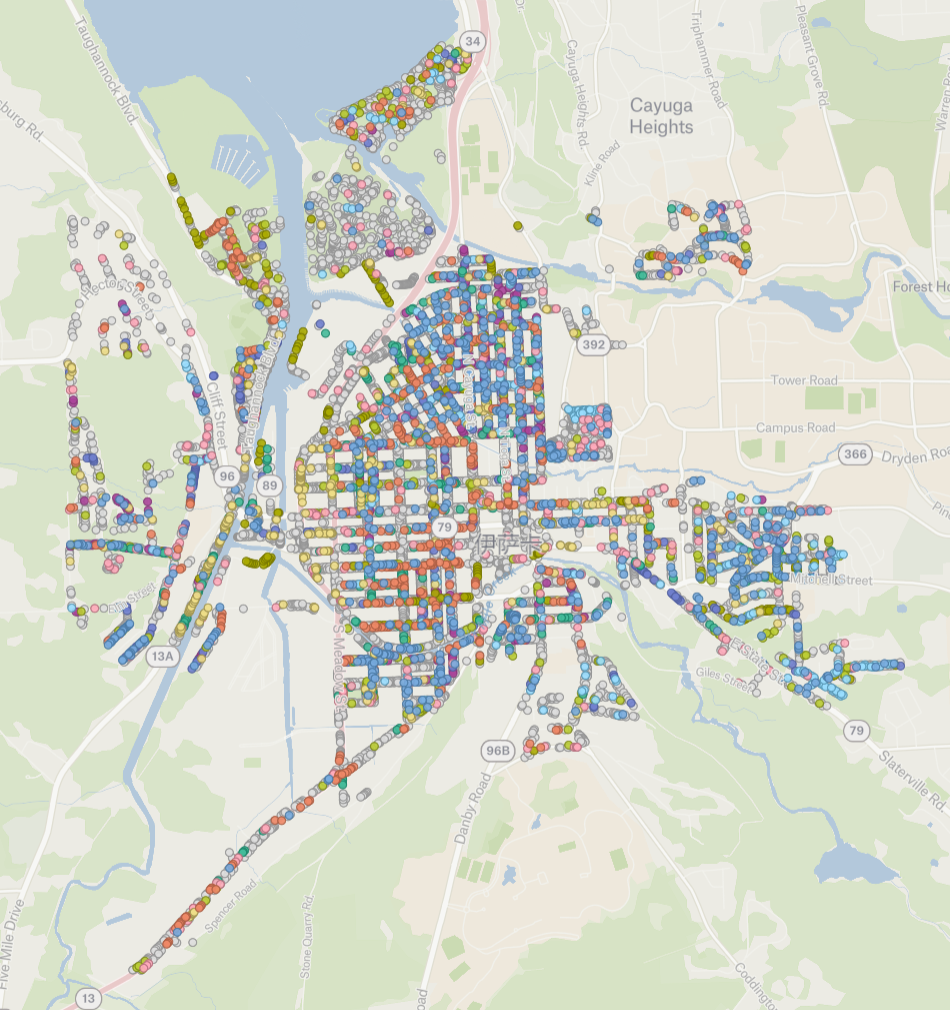

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Input the 'City_Managed_Trees' Dataset

In [11]:
city_trees = pd.read_csv('City_Managed_Trees.csv')
city_trees.info()
city_trees

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13052 entries, 0 to 13051
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          13052 non-null  float64
 1   Y          13052 non-null  float64
 2   OBJECTID   13052 non-null  int64  
 3   DBH        13052 non-null  int64  
 4   AREA       13052 non-null  object 
 5   PLDATE     12380 non-null  object 
 6   TREECLASS  13052 non-null  object 
 7   CULTIVAR   13052 non-null  object 
 8   ADDRESS    13052 non-null  int64  
 9   STREET     13052 non-null  object 
 10  SIDE       13052 non-null  object 
 11  ONSTR      13052 non-null  object 
 12  LATITUDE   13052 non-null  float64
 13  LONGITUDE  13052 non-null  float64
 14  SPName     13052 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 1.5+ MB


,X,Y,OBJECTID,DBH,AREA,PLDATE,TREECLASS,CULTIVAR,ADDRESS,STREET,SIDE,ONSTR,LATITUDE,LONGITUDE,SPName
0,-76.498047,42.452830,1,14,FALL CREEK,UNKNOWN,Street,UNASSIGNED,120,FALLS ST E,Front,FALLS ST E,42.452821,-76.498044,Silver Maple
1,-76.498491,42.452819,2,24,FALL CREEK,NaN,Street,UNASSIGNED,118,FALLS ST E,Front,FALLS ST E,42.452811,-76.498489,Northern Red Oak
2,-76.498321,42.452822,3,26,FALL CREEK,UNKNOWN,Street,UNASSIGNED,120,FALLS ST E,Front,FALLS ST E,42.452813,-76.498319,Silver Maple
3,-76.498239,42.452830,4,9,FALL CREEK,UNKNOWN,Street,UNASSIGNED,120,FALLS ST E,Front,FALLS ST E,42.452821,-76.498237,Japanese Tree Lilac
4,-76.498117,42.452830,5,8,FALL CREEK,UNKNOWN,Street,WINTER KING,120,FALLS ST E,Front,FALLS ST E,42.452821,-76.498115,Winter King Green Hawthorn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13047,-76.505594,42.439402,13048,2,DOWNTOWN,Fall 2022,Street,UNASSIGNED,436,STATE ST W,Front,STATE ST W,42.439394,-76.505592,Miyabei Maple
13048,-76.505640,42.439399,13049,2,DOWNTOWN,Fall 2022,Street,UNASSIGNED,436,STATE ST W,Front,STATE ST W,42.439391,-76.505637,Goldenrain Tree
13049,-76.501742,42.446749,13050,2,NORTH SIDE,NaN,Street,UNASSIGNED,106,MADISON ST,Front,MADISON ST,42.446741,-76.501740,Rose-of-Sharon
13050,-76.483871,42.452932,13051,2,EAST HILL,Fall 2022,Street,PINK FLAIR,326,FALL CREEK DR,Front,FALL CREEK DR,42.452924,-76.483868,Pink Flair Sargent Cherry


## 2.Calculate the Counts of Each kind of Tree

In [12]:
SPName_counts = city_trees['SPName'].value_counts().reset_index().head(50)
SPName_counts

,SPName,count
0,Norway Maple,733
1,Skyline Honeylocust,468
2,Crabapple,375
3,Stump Stump,347
4,Sugar Maple,302
5,Flowering Crabapple,294
6,Planting Site Large,270
7,Swamp White Oak,266
8,London Planetree,242
9,'Crimson King' Norway Maple,216


## 3.Calculate the Average Plant Year of Each Top "50" Tree

### Deal with "NAN" value

In [13]:
# Delete the "NAN" rows and "UNKNOWN" rows in original dataset.
city_trees_new = city_trees[city_trees['PLDATE'].notna() & (city_trees['PLDATE'] != 'UNKNOWN') & (city_trees['PLDATE'] != ' ')]
city_trees_new.info()
city_trees_new

<class 'pandas.core.frame.DataFrame'>
Index: 4603 entries, 12 to 13051
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          4603 non-null   float64
 1   Y          4603 non-null   float64
 2   OBJECTID   4603 non-null   int64  
 3   DBH        4603 non-null   int64  
 4   AREA       4603 non-null   object 
 5   PLDATE     4603 non-null   object 
 6   TREECLASS  4603 non-null   object 
 7   CULTIVAR   4603 non-null   object 
 8   ADDRESS    4603 non-null   int64  
 9   STREET     4603 non-null   object 
 10  SIDE       4603 non-null   object 
 11  ONSTR      4603 non-null   object 
 12  LATITUDE   4603 non-null   float64
 13  LONGITUDE  4603 non-null   float64
 14  SPName     4603 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 575.4+ KB


,X,Y,OBJECTID,DBH,AREA,PLDATE,TREECLASS,CULTIVAR,ADDRESS,STREET,SIDE,ONSTR,LATITUDE,LONGITUDE,SPName
12,-76.498931,42.453541,13,5,FALL CREEK,SPRING 2015,Street,UNASSIGNED,116,YORK ST E,Front,YORK ST E,42.453533,-76.498929,River Birch
13,-76.498724,42.453549,14,4,FALL CREEK,Spring 2008,Street,UNASSIGNED,118,YORK ST E,Front,YORK ST E,42.453541,-76.498722,Crabapple
14,-76.498572,42.453549,15,4,FALL CREEK,SPRING 2015,Street,UNASSIGNED,120,YORK ST E,Front,YORK ST E,42.453541,-76.498570,River Birch
16,-76.498364,42.453563,17,10,FALL CREEK,Fall 2011,Street,PURPUREA,120,YORK ST E,Front,YORK ST E,42.453554,-76.498362,Indian Bean Tree
22,-76.499884,42.453075,23,3,FALL CREEK,Spring 2008,Street,SUGAR CONE,1206,CAYUGA ST N,Front,CAYUGA ST N,42.453067,-76.499882,Sugar Cone Maple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13046,-76.505550,42.439409,13047,2,DOWNTOWN,Fall 2022,Street,UNASSIGNED,436,STATE ST W,Front,STATE ST W,42.439401,-76.505548,Goldenrain Tree
13047,-76.505594,42.439402,13048,2,DOWNTOWN,Fall 2022,Street,UNASSIGNED,436,STATE ST W,Front,STATE ST W,42.439394,-76.505592,Miyabei Maple
13048,-76.505640,42.439399,13049,2,DOWNTOWN,Fall 2022,Street,UNASSIGNED,436,STATE ST W,Front,STATE ST W,42.439391,-76.505637,Goldenrain Tree
13050,-76.483871,42.452932,13051,2,EAST HILL,Fall 2022,Street,PINK FLAIR,326,FALL CREEK DR,Front,FALL CREEK DR,42.452924,-76.483868,Pink Flair Sargent Cherry


### Save the required value in "PLDATE" column

In [14]:
city_trees_new['PLDATE'] = city_trees_new['PLDATE'].str[-4:]
city_trees_new['PLDATE'] = city_trees_new['PLDATE'].astype(int)
city_trees_new

C:\Users\admin\AppData\Local\Temp\ipykernel_27460\3733364371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_trees_new['PLDATE'] = city_trees_new['PLDATE'].str[-4:]
C:\Users\admin\AppData\Local\Temp\ipykernel_27460\3733364371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_trees_new['PLDATE'] = city_trees_new['PLDATE'].astype(int)


,X,Y,OBJECTID,DBH,AREA,PLDATE,TREECLASS,CULTIVAR,ADDRESS,STREET,SIDE,ONSTR,LATITUDE,LONGITUDE,SPName
12,-76.498931,42.453541,13,5,FALL CREEK,2015,Street,UNASSIGNED,116,YORK ST E,Front,YORK ST E,42.453533,-76.498929,River Birch
13,-76.498724,42.453549,14,4,FALL CREEK,2008,Street,UNASSIGNED,118,YORK ST E,Front,YORK ST E,42.453541,-76.498722,Crabapple
14,-76.498572,42.453549,15,4,FALL CREEK,2015,Street,UNASSIGNED,120,YORK ST E,Front,YORK ST E,42.453541,-76.498570,River Birch
16,-76.498364,42.453563,17,10,FALL CREEK,2011,Street,PURPUREA,120,YORK ST E,Front,YORK ST E,42.453554,-76.498362,Indian Bean Tree
22,-76.499884,42.453075,23,3,FALL CREEK,2008,Street,SUGAR CONE,1206,CAYUGA ST N,Front,CAYUGA ST N,42.453067,-76.499882,Sugar Cone Maple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13046,-76.505550,42.439409,13047,2,DOWNTOWN,2022,Street,UNASSIGNED,436,STATE ST W,Front,STATE ST W,42.439401,-76.505548,Goldenrain Tree
13047,-76.505594,42.439402,13048,2,DOWNTOWN,2022,Street,UNASSIGNED,436,STATE ST W,Front,STATE ST W,42.439394,-76.505592,Miyabei Maple
13048,-76.505640,42.439399,13049,2,DOWNTOWN,2022,Street,UNASSIGNED,436,STATE ST W,Front,STATE ST W,42.439391,-76.505637,Goldenrain Tree
13050,-76.483871,42.452932,13051,2,EAST HILL,2022,Street,PINK FLAIR,326,FALL CREEK DR,Front,FALL CREEK DR,42.452924,-76.483868,Pink Flair Sargent Cherry


### Got the Results

In [16]:
city_trees_new['PLDATE'].describe()

count    4603.000000
mean     2008.056919
std         7.968308
min      1970.000000
25%      2002.000000
50%      2008.000000
75%      2015.000000
max      2022.000000
Name: PLDATE, dtype: float64

In [36]:
# transfer "SPName" column into the series
sp_names = SPName_counts['SPName']

# Create a empty dataframe to store the filtered DataFrame
city_trees_filtered = pd.DataFrame(columns=city_trees_new.columns)

# Loop for look for the same "name" in city_trees_new['SPName']
for sp_name in sp_names:
    selected_data = city_trees_new[city_trees_new['SPName'] == sp_name]
    city_trees_filtered = pd.concat([city_trees_filtered, selected_data], ignore_index=True)

# 打印包含筛选后数据的新 DataFrame
city_trees_filtered

,X,Y,OBJECTID,DBH,AREA,PLDATE,TREECLASS,CULTIVAR,ADDRESS,STREET,SIDE,ONSTR,LATITUDE,LONGITUDE,SPName
0,-76.501060,42.441320,2396,18,DOWNTOWN,1970,Street,UNASSIGNED,304,GENEVA ST N,Side,BUFFALO ST W,42.441312,-76.501057,Norway Maple
1,-76.503653,42.435422,2956,21,SOUTH SIDE,1970,Street,UNASSIGNED,217,CENTER ST,Side,PLAIN ST S,42.435414,-76.503651,Norway Maple
2,-76.502553,42.435515,2969,1,SOUTH SIDE,2022,Street,UNASSIGNED,201,CENTER ST,Front,CENTER ST,42.435507,-76.502550,Norway Maple
3,-76.502608,42.435510,2970,1,SOUTH SIDE,2022,Street,UNASSIGNED,201,CENTER ST,Front,CENTER ST,42.435501,-76.502606,Norway Maple
4,-76.504657,42.435558,3093,19,SOUTH SIDE,1970,Street,UNASSIGNED,316,CENTER ST,Front,CENTER ST,42.435549,-76.504654,Norway Maple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,-76.508206,42.432936,11213,4,SOUTH SIDE,2008,Street,INERMIS IMPERIAL,614,MEADOW ST S,Front,MEADOW ST S,42.432927,-76.508203,Imperial Honeylocust
2002,-76.508216,42.432248,11216,2,SOUTH SIDE,2008,Street,INERMIS IMPERIAL,608,MEADOW ST S,Front,MEADOW ST S,42.432240,-76.508213,Imperial Honeylocust
2003,-76.508214,42.432177,11217,4,SOUTH SIDE,2008,Street,INERMIS IMPERIAL,702,MEADOW ST S,Front,MEADOW ST S,42.432169,-76.508212,Imperial Honeylocust
2004,-76.508147,42.431004,11223,3,SOUTH SIDE,2008,Street,INERMIS IMPERIAL,714,MEADOW ST S,Front,MEADOW ST S,42.430995,-76.508145,Imperial Honeylocust


In [49]:
city_trees_filtered = city_trees_filtered.groupby('SPName')['PLDATE'].mean().reset_index()
city_trees_filtered['PLDATE'] = city_trees_filtered['PLDATE'].astype(int)

# Arragment by desescend
city_trees_filtered.sort_values(by='PLDATE', ascending=False, inplace=True)
city_trees_filtered

,SPName,PLDATE
36,Red Maple,2016
24,London Planetree,2015
17,Honeylocust,2014
8,Common Lilac,2013
31,Norway Spruce,2012
14,Ginkgo,2011
45,Winter King Green Hawthorn,2011
4,Allegheny Serviceberry,2011
38,Scarlet Oak,2010
29,Northern Red Oak,2010


## Merge all Datasets

In [51]:
final_city_trees = city_trees_filtered.merge(SPName_counts,on='SPName')
final_city_trees

,SPName,PLDATE,count
0,Red Maple,2016,214
1,London Planetree,2015,242
2,Honeylocust,2014,99
3,Common Lilac,2013,65
4,Norway Spruce,2012,148
5,Ginkgo,2011,82
6,Winter King Green Hawthorn,2011,89
7,Allegheny Serviceberry,2011,82
8,Scarlet Oak,2010,63
9,Northern Red Oak,2010,145


In [54]:
# final_city_trees.to_csv('final_city_trees.csv', index=False)

## Drawing Concentric Circles

In [56]:
import pandas as pd
import matplotlib.patches as patches

In [75]:
# Normalize the count column
max_count = final_city_trees['count'].max()
final_city_trees['normalized_count'] = final_city_trees['count'] / max_count
final_city_trees

,SPName,PLDATE,count,normalized_count
0,Red Maple,2016,214,0.291951
1,London Planetree,2015,242,0.330150
2,Honeylocust,2014,99,0.135061
3,Common Lilac,2013,65,0.088677
4,Norway Spruce,2012,148,0.201910
5,Ginkgo,2011,82,0.111869
6,Winter King Green Hawthorn,2011,89,0.121419
7,Allegheny Serviceberry,2011,82,0.111869
8,Scarlet Oak,2010,63,0.085948
9,Northern Red Oak,2010,145,0.197817


In [102]:
# # 定义一个常数，来调整线的最大宽度。您可以根据需要进行调整。
# max_line_width = 10

# plt.figure(figsize=(10, 10))

# # 绘制同心圆
# for i, row in final_city_trees.iterrows():
#     line_width = max_line_width * row['normalized_count']
#     theta2 = 360 * row['normalized_count']  # 完成度转换为角度
#     arc = patches.Arc((0, 0), 2*(i+1), 2*(i+1), angle=0.0, theta1=0.0, theta2=theta2, color='blue', linewidth=line_width)
#     plt.gca().add_patch(arc)

# plt.xlim(-len(final_city_trees), len(final_city_trees))
# plt.ylim(-len(final_city_trees), len(final_city_trees))
# plt.gca().set_aspect('equal', adjustable='box')
# plt.show()

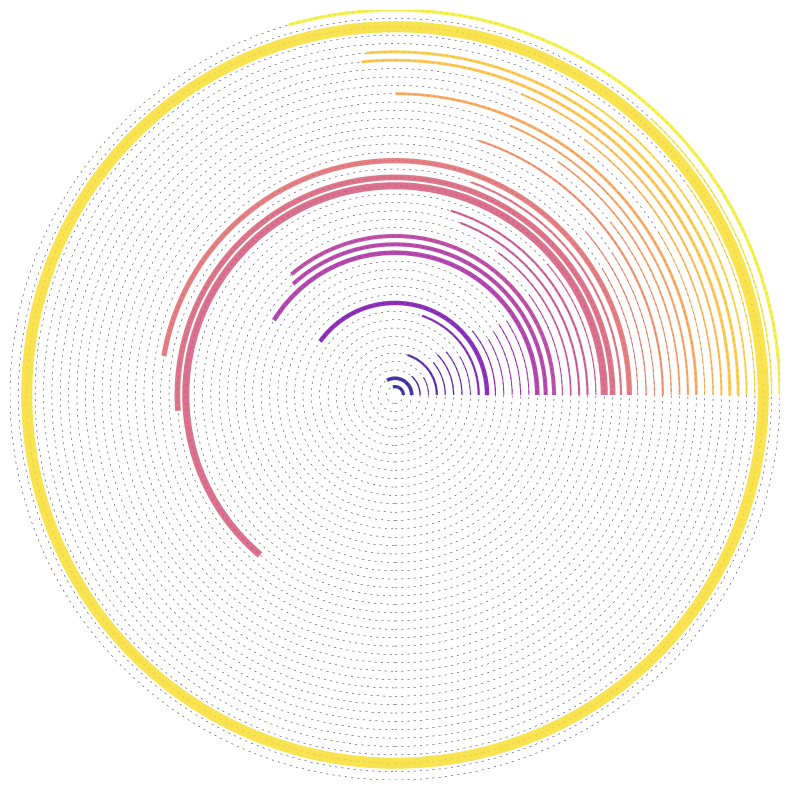

In [106]:
# Define a constant to adjust the maximum width of the line
max_line_width = 8

# Get color mapping
cmap = plt.get_cmap("plasma")

plt.figure(figsize=(10, 10))

# 绘制同心圆
for i, row in final_city_trees.iterrows():
    circle = plt.Circle((0, 0), i+1, color='black', fill=False, linewidth=0.3, linestyle=(0, (5, 10)))
    plt.gca().add_patch(circle)

# Drawing Concentric Circle
for i, row in final_city_trees.iterrows():
    line_width = max_line_width * row['normalized_count']
    theta2 = 360 * row['normalized_count']  # Completion converted to angle
    color = cmap(i / len(final_city_trees))  # Getting colors using color mapping
    arc = patches.Arc((0, 0), 2*(i+1), 2*(i+1), angle=0.0, theta1=0.0, theta2=theta2, color=color, linewidth=line_width, alpha=0.8)
    plt.gca().add_patch(arc)

plt.xlim(-len(final_city_trees), len(final_city_trees))
plt.ylim(-len(final_city_trees), len(final_city_trees))
plt.gca().set_aspect('equal', adjustable='box')

plt.axis('off')

plt.savefig("output_image.png", dpi=300, bbox_inches='tight')
plt.show()